# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 

In [3]:
import math

In [4]:
import seaborn as sns

In [5]:
import numpy as np

In [6]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [7]:
df.head(10) # получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [8]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [9]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [10]:
df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [11]:
# переименование столбцов
df = df.rename(columns={'cityCenters_nearest' : 'city_centers_nearest', 
                        'parks_around3000' : 'parks_around_3000', 'ponds_around3000' : 'ponds_around_3000'}) 

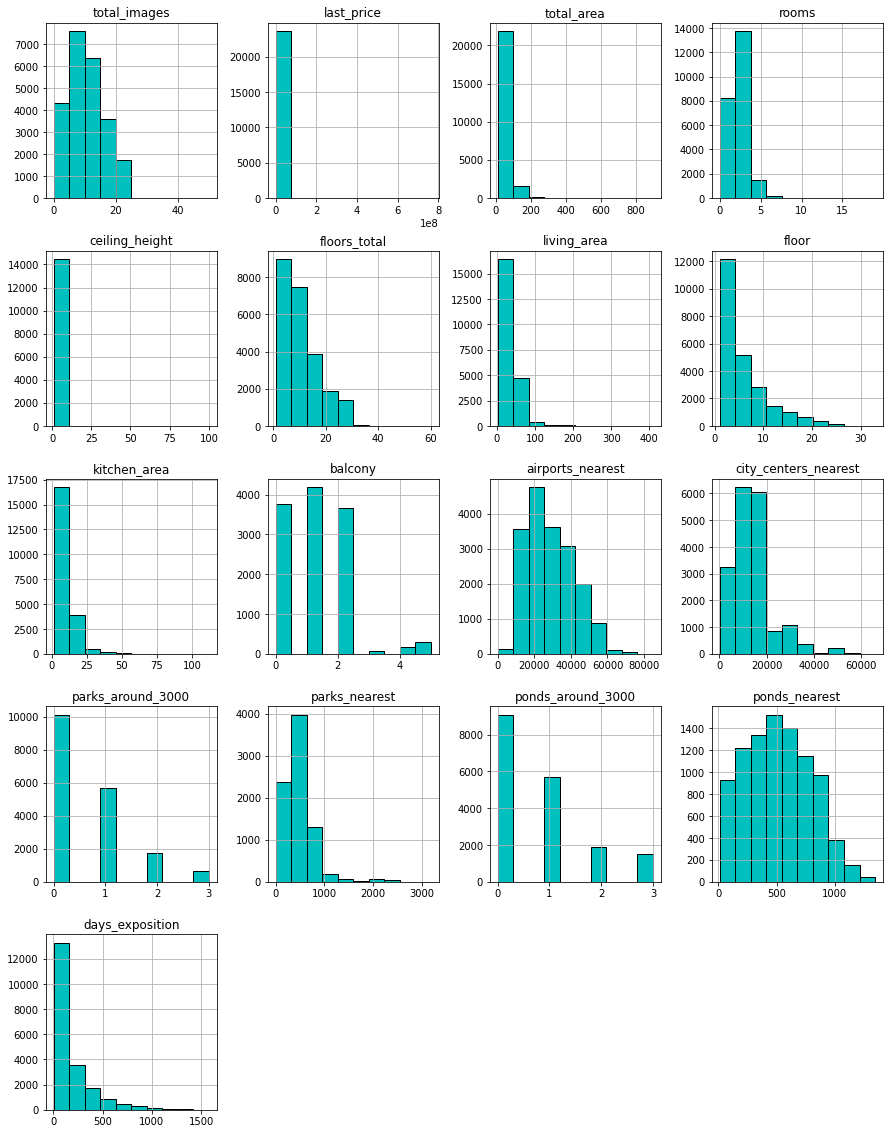

In [12]:
df.hist(figsize=(15, 20), color='c', ec='black')
plt.show()

По данной гистограмме стоит отметить, что в столбце rooms есть нестандартные значения: количество комнат, равных нулю.
В столбце ceiling_height есть нестандартные значения: слишком большая высота потолка.
В столбце total_area есть слишком большая площадь квартир. 
В остальных столбцах нет аномалий или нестандартных значений.

In [13]:
df.isna().sum() # подсчёт пропусков

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
df.isnull().mean() * 100 # доля пустых значений

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
city_centers_nearest    23.287902
parks_around_3000       23.283683
parks_nearest           65.909954
ponds_around_3000       23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [15]:
df.duplicated().sum() # подсчёт явных дубликатов

0

В данной таблице большое количество пропусков. В столбцах ceiling_height, is_apartment, balcony, airports_nearest, 
city_centers_nearest, parks_around_3000, parks_nearest, ponds_around_3000, ponds_nearest, days_exposition доля пропусков составляет от 13% до 88%. <br/>  
Необходимо пройтись по каждому столбцу и выявить причины пропусков. 

### Выполните предобработку данных

Проверим столбцы на аномалии или нестандартные значения. В каждом столбце установим корректный тип данных.

In [16]:
df['last_price'] = df['last_price'].astype(int) # Необходимо изменить тип данных

In [17]:
# Необходимо изменить тип данных
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 

In [18]:
df['rooms'].describe() 

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [19]:
df['rooms'] = df['rooms'].astype(int) #Необходимо изменить тип данных.

In [20]:
df['floors_total'] = df['floors_total'].dropna().astype(int) #удалим пропущенные значения. Необходимо изменить тип данных.

In [21]:
df['is_apartment'].value_counts() 

False    2725
True       50
Name: is_apartment, dtype: int64

In [22]:
df['is_apartment'] = df['is_apartment'].astype(bool) # Необходимо изменить тип данных.

In [23]:
df['is_apartment'] = df['is_apartment'].fillna(value=False) #в данном столбце заменим пропущенные значения на False. 

Основное отличие апартаментов от квартиры это статус помещения. Квартиры относятся к жилым помещениям, а апартаменты к коммерческим. Чтобы заполнить пропущенные значения у нас не достает данных. 

In [24]:
df['balcony'] = df['balcony'].fillna('0').astype(int) # замена пропущенных значений на '0'. Необходимо изменить тип данных.

Отсутствующие данные в столбце, отвечающем за количество балконов примем за ноль.

In [25]:
df['locality_name'].value_counts() # Проверим наличие неявные дубликаты в названиях населённых пунктов

Санкт-Петербург                     15721
посёлок Мурино                        522
посёлок Шушары                        440
Всеволожск                            398
Пушкин                                369
                                    ...  
село Шум                                1
садовое товарищество Новая Ропша        1
поселок Коробицыно                      1
поселок Дружноселье                     1
деревня Большая Пустомержа              1
Name: locality_name, Length: 364, dtype: int64

In [26]:
df['locality_name'].sort_values(ascending=True).unique() #просмотр уникальных отсортированных названий населённых пунктов

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Приведем к строчному типу, чтобы не пропустить дубликаты. Заменим буквы "ё" на "е". Сделаем замену однотипных названий населенных пуктов.

In [27]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е')

In [28]:
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок') # устранение неявных дубликатов
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок')
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'СНТ')
df['locality_name'] = df['locality_name'].str.replace('садовое товарищество', 'СНТ')

In [29]:
df.dropna(subset=['locality_name'], inplace=True) #удаляем строки, где отсутствует локация

In [30]:
df['parks_around_3000'] = df['parks_around_3000'].fillna(value=0).astype(int) # Необходимо изменить тип данных.

In [31]:
df['ponds_around_3000'] = df['ponds_around_3000'].fillna(value=0).astype(int) # Необходимо изменить тип данных.

In [32]:
df['ceiling_height'].value_counts() 

2.50     3515
2.60     1645
2.70     1572
3.00     1109
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64

Столбец "ceiling_height" содержит информацию о высоте потолка. Это важная информация, характеризующая объект недвижимости. В зависимости от вида здания, времени его постройки, этажности, а также от района города меняются стандарты строительства. «Сталинки» и дома старой постройки 3,0-3,6м, «Хрущевки» 2,5-2,7м, «Брежневки» и квартиры улучшенной планировки 2,6-2,7м, панельные и блочные дома 2,5-2,75м, современные многоквартирные дома 2,7-3,2м, частные дома и малоэтажное строительство от 2,5м и выше согласно проекту. Соотвественно, для начала нам нужно определить к какому району относятся объекты, с пропущенными значениями и определить их высотность.

In [33]:
df['city_centers_nearest'].value_counts() 

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
8565.0      1
5278.0      1
11575.0     1
3205.0      1
4234.0      1
Name: city_centers_nearest, Length: 7627, dtype: int64

In [34]:
def ceiling_height(row): #создание функции, определяющей расположение объекта недвижимости относительно центра
    if row['city_centers_nearest'] < 2500:
        return 'центр' 
    elif row['city_centers_nearest'] < 5000:
        return 'в пределах центра' 
    elif row['city_centers_nearest'] < 17000:
        return 'в пределах города' 
    elif row['city_centers_nearest'] >= 17000:
        return 'за городом' 

In [35]:
df['category_city_centers_nearest'] = df.apply(ceiling_height, axis=1)

In [36]:
df[['locality_name', 'city_centers_nearest', 'category_city_centers_nearest']].head(10)

,locality_name,city_centers_nearest,category_city_centers_nearest
0,Санкт-Петербург,16028.0,в пределах города
1,поселок Шушары,18603.0,за городом
2,Санкт-Петербург,13933.0,в пределах города
3,Санкт-Петербург,6800.0,в пределах города
4,Санкт-Петербург,8098.0,в пределах города
5,поселок Янино-1,NaN,None
6,поселок Парголово,19143.0,за городом
7,Санкт-Петербург,11634.0,в пределах города
8,поселок Мурино,NaN,None
9,Санкт-Петербург,15008.0,в пределах города


In [37]:
df.groupby('category_city_centers_nearest')['ceiling_height'].median().sort_values(ascending=False)

category_city_centers_nearest
центр                3.20
в пределах центра    3.08
в пределах города    2.65
за городом           2.60
Name: ceiling_height, dtype: float64

In [38]:
ceiling_height_median = df.groupby('category_city_centers_nearest')['ceiling_height'].median()

In [39]:
#заменим пропущенные значения на медиальные в каждой категории
df['ceiling_height'] = df['ceiling_height'].fillna(df['category_city_centers_nearest'].map(ceiling_height_median)) 

In [40]:
df.head() #проверка

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,category_city_centers_nearest
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,в пределах города
1,7,3350000,40.4,2018-12-04,1,2.60,11.0,18.6,1,True,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,за городом
2,10,5196000,56.0,2015-08-20,2,2.65,5.0,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,в пределах города
3,0,64900000,159.0,2015-07-24,3,2.65,14.0,NaN,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,в пределах города
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,в пределах города


In [41]:
df['ceiling_height'] = round(df['ceiling_height'], 2) # округлим до сотых

Рассмотрим столбы, хранящие информацию о плoщадях помещений.

In [42]:
df['living_area'].value_counts()

18.00    882
17.00    674
30.00    598
16.00    485
20.00    479
        ... 
50.26      1
43.81      1
54.43      1
86.10      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

In [43]:
df['living_area'] = round(df['living_area'], 2) #округлим до сотых

In [44]:
living_area_n = df['living_area'].mean() / df['total_area'].mean() #заменим пропущенные значения жилой площади
df['living_area'].fillna(living_area_n * df['total_area'], inplace=True)

In [45]:
df['kitchen_area'].value_counts() 

6.00     1298
10.00    1259
8.00     1108
9.00     1100
7.00     1062
         ... 
13.73       1
14.74       1
53.10       1
13.41       1
16.74       1
Name: kitchen_area, Length: 968, dtype: int64

In [46]:
kitchen_area_n = df['kitchen_area'].mean() / df['total_area'].mean() # заменим пропущенные значения площади кухни
df['kitchen_area'].fillna(kitchen_area_n * df['total_area'], inplace=True)

In [47]:
df['days_exposition'].value_counts()

45.0      879
60.0      538
7.0       234
30.0      208
90.0      203
         ... 
969.0       1
1.0         1
1147.0      1
1148.0      1
1174.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [48]:
df.isnull().sum()

total_images                         0
last_price                           0
total_area                           0
first_day_exposition                 0
rooms                                0
ceiling_height                    2569
floors_total                        85
living_area                          0
floor                                0
is_apartment                         0
studio                               0
open_plan                            0
kitchen_area                         0
balcony                              0
locality_name                        0
airports_nearest                  5534
city_centers_nearest              5511
parks_around_3000                    0
parks_nearest                    15586
ponds_around_3000                    0
ponds_nearest                    14565
days_exposition                   3180
category_city_centers_nearest     5511
dtype: int64

In [49]:
df.head(10) #получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,category_city_centers_nearest
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,в пределах города
1,7,3350000,40.40,2018-12-04,1,2.60,11.0,18.600000,1,True,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,за городом
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,в пределах города
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.790204,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,в пределах города
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,в пределах города
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.400000,5,True,...,0,поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,None
6,6,3700000,37.30,2017-11-02,1,2.60,26.0,10.600000,6,True,...,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,за городом
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,40.884142,22,True,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,в пределах города
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.430000,26,True,...,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,None
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,True,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0,в пределах города


### Добавьте в таблицу новые столбцы

 Добавим новые параметры в таблицу:  
       – цена одного квадратного метра;  
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);  
       – месяц публикации объявления;  
       – год публикации объявления;  
       – тип этажа квартиры (значения — «первый», «последний», «другой»);  
       – расстояние до центра города в километрах.

In [50]:
df['square_meter_price'] = df['last_price'] / df['total_area'] #добавим столбец со стоимостью квадратного метра целочисленного типа 
df['square_meter_price'] = df['square_meter_price'].astype(int)

In [51]:
df['weekday'] = df['first_day_exposition'].dt.weekday #добавим столбец дня публикации объявления
df['month'] = df['first_day_exposition'].dt.month #добавим столбец месяца публикации объявления
df['year'] = df['first_day_exposition'].dt.year #добавим столбец года публикации объявления

In [52]:
def floor_n(row): #создадим функцию, которая заполнит столбец типа этажа квартиры
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_n, axis=1)

In [53]:
df['city_centers_nearest'] = df['city_centers_nearest'] / 1000 #расстояние до центра города переведем в километры
df['city_centers_nearest'] = round(df['city_centers_nearest'], 2) #округлим до сотых

In [54]:
df.head(10) #получение первых 10 строк таблицы df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,category_city_centers_nearest,square_meter_price,weekday,month,year,floor_type
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,True,...,482.0,2,755.0,NaN,в пределах города,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.60,11.0,18.600000,1,True,...,NaN,0,NaN,81.0,за городом,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,True,...,90.0,2,574.0,558.0,в пределах города,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,90.790204,9,True,...,84.0,3,234.0,424.0,в пределах города,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,True,...,112.0,1,48.0,121.0,в пределах города,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.400000,5,True,...,NaN,0,NaN,55.0,None,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.60,26.0,10.600000,6,True,...,NaN,0,NaN,155.0,за городом,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,40.884142,22,True,...,NaN,0,NaN,NaN,в пределах города,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.430000,26,True,...,NaN,0,NaN,189.0,None,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,True,...,NaN,0,NaN,289.0,в пределах города,88524,6,2,2017,другой


### Проведите исследовательский анализ данных

In [55]:
df[['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floors_total', 
    'city_centers_nearest', 'parks_nearest']].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floors_total,city_centers_nearest,parks_nearest
count,23650.000000,23650.00000,23650.000000,2.365000e+04,23650.000000,21081.000000,23565.000000,18139.000000,8064.000000
mean,60.329069,34.58242,10.502875,6.541127e+06,2.070106,2.744357,10.675875,14.197815,490.830729
std,35.661808,22.35971,6.037440,1.089640e+07,1.078620,1.049871,6.594823,8.606827,342.554386
min,12.000000,2.00000,1.300000,1.219000e+04,0.000000,1.000000,1.000000,0.180000,1.000000
25%,40.000000,19.00000,7.000000,3.400000e+06,1.000000,2.600000,5.000000,9.240000,288.000000
50%,52.000000,30.00000,9.000000,4.650000e+06,2.000000,2.650000,9.000000,13.100000,454.500000
75%,69.700000,42.10000,12.000000,6.799000e+06,3.000000,2.750000,16.000000,16.290000,612.000000
max,900.000000,409.70000,112.000000,7.630000e+08,19.000000,100.000000,60.000000,65.970000,3190.000000


In [56]:
pd.pivot_table(df, index='last_price', values=['total_area', 'rooms', 'ceiling_height'])

,ceiling_height,rooms,total_area
last_price,,,
12190,2.75,2.000000,109.000000
430000,NaN,1.500000,42.200000
440000,NaN,1.000000,40.000000
450000,2.65,1.750000,40.100000
470000,NaN,1.333333,40.833333
...,...,...,...
300000000,3.40,7.000000,618.000000
330000000,3.50,3.000000,190.000000
401300000,3.20,5.000000,401.000000


Рассмотрим основную информацию об объектах недвижимости. Основную информацию выведем, группируя по количеству квартир. Получим списки в порядке убывания. Основные гистограммы покажут нам графики по следующим параметрам квартир:  
- общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего парка.

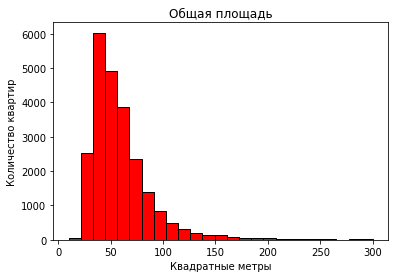

Наибольшие значения:


19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
Name: total_area, dtype: float64

In [57]:
plt.hist(df['total_area'], bins=25, color='r', ec='black',range=(10,300)) #общая площадь
plt.title('Общая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['total_area'].sort_values(ascending=False).head()

Большинство квартир от 40 до 70 квадратных метров общей площадью. Меньше 25 кв.м. и больше 150 кв.м. встречаются кврайне редко. Также встречаются квартиры сомнительных площадей (минимум и максимум): 12 кв.м. и 900 кв.м.

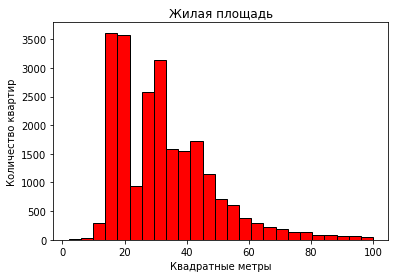

Наибольшие значения:


19540    409.700000
5358     409.000000
3117     360.305779
12401    347.500000
4237     332.000000
Name: living_area, dtype: float64

In [58]:
plt.hist(df['living_area'], bins=25, color='r', ec='black', range=(2,100)) #жилая площадь
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['living_area'].sort_values(ascending=False).head()

На данном графике есть несколько максимумов. Первый максимум это жилая площадь однокомнатных квартир или студий. Их площадь составляет 15-20 кв.м. Второй максимум это жилая площадь двухкомнатных квартир. Их площадь составляет 25-30 кв.м. Третий максимум это жилая площадь трехкомнатных квартир. Их площадь составляет 40-50 кв.м. 

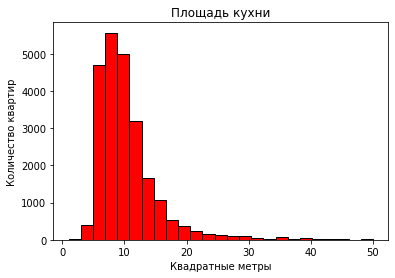

Наибольшие значения:


19540    112.0
20215    107.0
2489     100.7
5358     100.0
16239     93.2
Name: kitchen_area, dtype: float64

In [59]:
plt.hist(df['kitchen_area'], bins=25, color='r', ec='black', range=(1,50)) #площадь кухни
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['kitchen_area'].sort_values(ascending=False).head()

Большинство квартир имеют кухни площадью от 5 до 15 кв.м. Больше 30 кв.м. кухни встречаются крайне редко. 

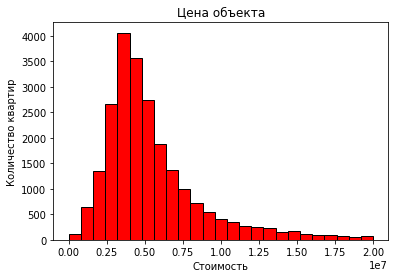

Наибольшие значения:


12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
Name: last_price, dtype: int64

In [60]:
plt.hist(df['last_price'], bins=25, color='r', ec='black', range=(0,20000000)) #цена объекта
plt.title('Цена объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['last_price'].sort_values(ascending=False).head()

Большинство квартир стоят от 2,5 до 7,5 млн.руб. Средняя цена составляет 5 млн.руб.

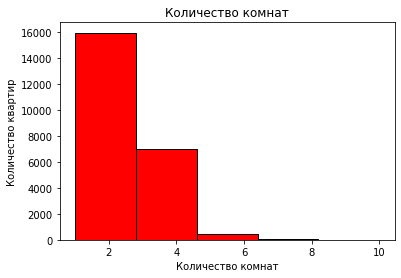

Наибольшие значения:


14498    19
18848    16
5358     15
866      14
20829    14
Name: rooms, dtype: int64

In [61]:
plt.hist(df['rooms'], bins=5, color='r', ec='black', range=(1,10)) #количество комнат
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['rooms'].sort_values(ascending=False).head()

В основном квартиры состоят из 1, 2 и 3 комнат. Больше 6 комнат практически не встречаются. 

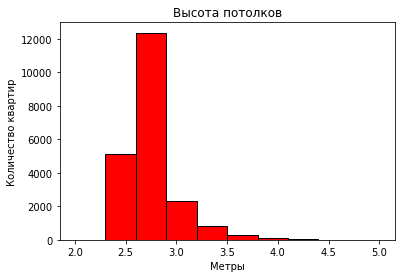

Наибольшие значения:


22869    100.0
3148      32.0
22336     32.0
21377     27.5
5246      27.0
Name: ceiling_height, dtype: float64

In [62]:
plt.hist(df['ceiling_height'], bins=10, color='r', ec='black', range=(2,5)) #высота потолков
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['ceiling_height'].sort_values(ascending=False).head()

В основном квартиры имеют высоту потолка от 2,5 до 3 метров. Есть аномальные значения более 27 м. 

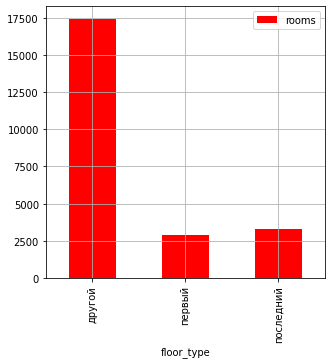

In [63]:
(                                                    
    df.pivot_table(index='floor_type', values='rooms', aggfunc='count')
    .plot.bar(color='r', figsize=(5, 5), grid=True, style='o')
)
plt.show()

Самыми распространенными являются квартиры, находящиеся выше первого и ниже последнего этажей. Их около 17500. Наимного реже встречаются предложения о продаже квартир на последних этажах. Их около 3500. Самыми редкими являются предложения на первом этаже. Их около 3000. 

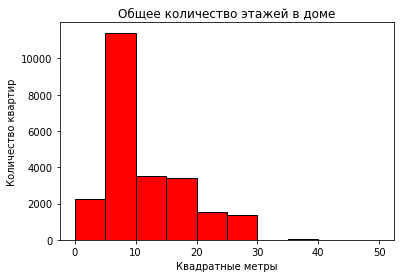

Наибольшие значения:


2253     60.0
16731    52.0
16934    37.0
5807     36.0
11079    36.0
Name: floors_total, dtype: float64

In [64]:
plt.hist(df['floors_total'], bins=10, color='r', ec='black', range=(0,50)) #общее количество этажей в доме
plt.title('Oбщее количество этажей в доме')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['floors_total'].sort_values(ascending=False).head()

Самые полулярными являются дома от 5 до 16 этажей

In [65]:
df['city_centers_nearest'] = df['city_centers_nearest'] * 1000

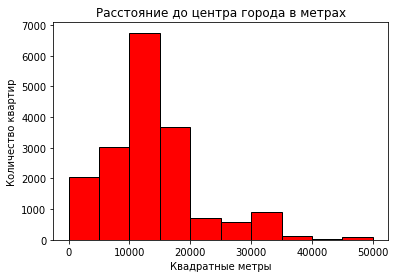

Наибольшие значения:


9640     65970.0
5340     65950.0
577      65760.0
20746    65100.0
5218     64860.0
Name: city_centers_nearest, dtype: float64

In [66]:
plt.hist(df['city_centers_nearest'], bins=10, color='r', ec='black', range=(0,50000)) #расстояние до центра города в метрах
plt.title('Pасстояние до центра города в метрах')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['city_centers_nearest'].sort_values(ascending=False).head()

В основном квартиры находятся на расстоянии 5000 - 15000 м до центра города 

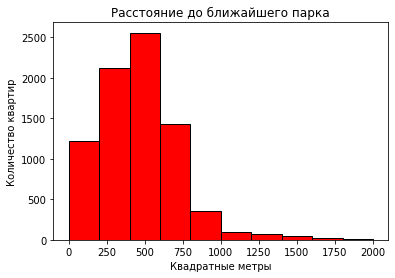

Наибольшие значения:


10959    3190.0
19430    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
Name: parks_nearest, dtype: float64

In [67]:
plt.hist(df['parks_nearest'], bins=10, color='r', ec='black', range=(0,2000)) #расстояние до ближайшего парка
plt.title('Pасстояние до ближайшего парка')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие значения:')
df['parks_nearest'].sort_values(ascending=False).head()

Чаще всего квартиры находятся на расстоянии 250 - 750 м до ближайшего парка

Далее изучим, как быстро продавались квартиры (столбец `days_exposition`):  
    - построем гистограмму;  
    - рассчитаем среднее и медиану;  
    - опишем, сколько обычно занимает продажа и укажем, какие продажи можно считать быстрыми, а какие — необычно долгими.

<AxesSubplot:>

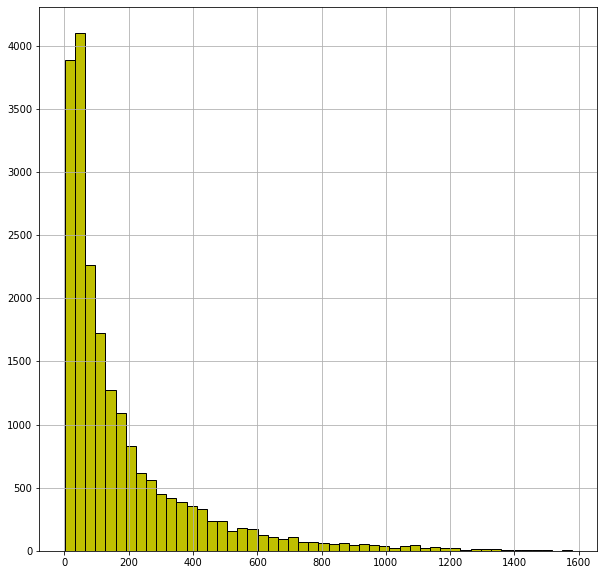

In [68]:
df['days_exposition'].hist(bins=50, color='y', ec='black', figsize=(10,10))

Квартиры продаются лучше всего в первые дни публикации объявления. В первые 100 дней продано больше всего квартир. 

In [69]:
df['days_exposition'].describe() #найдем средннее и медиану

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [70]:
df['days_exposition'].median() #найдем медиану

95.0

Среднее время продажи 180 дней. Медианное время продажи 95 дней. 
Быстрой продажей можно считать период менее 45 дней. Долгой продажей период более 230 дней. 

Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта. Построем графики, которые показывают зависимость цены от параметров:  
        - общая площадь;  
        - жилая площадь;  
        - площадь кухни;  
        - количество комнат;  
        - тип этажа, на котором расположена квартира (первый, последний, другой);  
        - дата размещения (день недели, месяц, год).

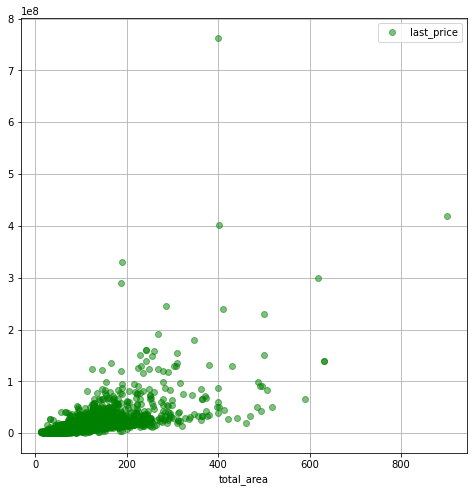

Зависимость цены квартиры от общей площади:


0.6537428966335395

In [71]:
#найдем зависимость цены квартиры от общей площади
df.plot(x='total_area', y='last_price', color='g', figsize=(8, 8), grid=True, style='o', alpha=0.5) 
plt.show()
print('Зависимость цены квартиры от общей площади:')
df['total_area'].corr(df['last_price'])

Коэффициент корреляции составляет 0,65 - это умеренная положительная связь. Чем больше площадь квартиры, тем выше общая стоимость. 

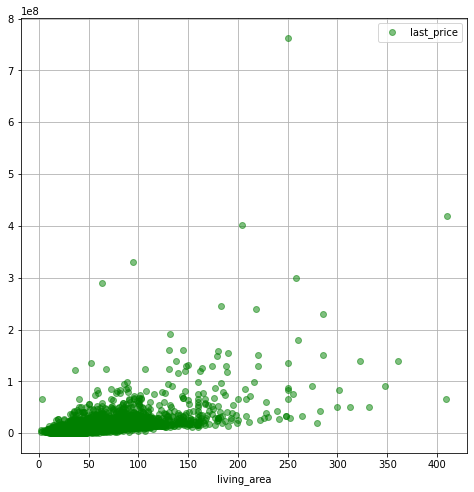

Зависимость цены квартиры от жилой площади:


0.5858314197786696

In [72]:
#найдем зависимость цены квартиры от жилой площади
df.plot(x='living_area', y='last_price', color='g', figsize=(8, 8), grid=True, style='o', alpha=0.5) 
plt.show()
print('Зависимость цены квартиры от жилой площади:')
df['living_area'].corr(df['last_price'])

Коэффициент корреляции составляет 0,59 - это умеренная положительная связь. Чем больше жилая площадь квартиры, тем выше общая стоимость. Зависимость цены квартиры от жилой площади немного ниже, чем зависимость цены квартиры от общей площади квартиры.

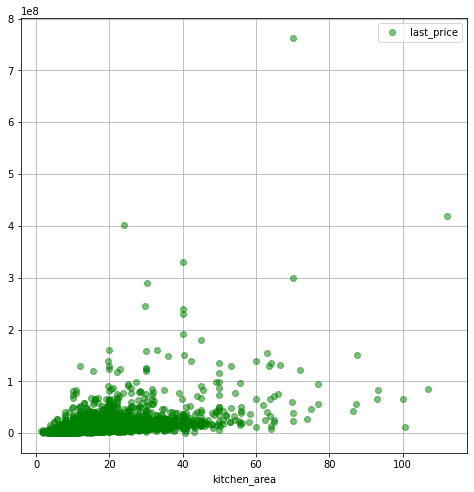

Зависимость цены квартиры от площади кухни:


0.514493449448002

In [73]:
#найдем зависимость цены квартиры от площади кухни
df.plot(x='kitchen_area', y='last_price', color='g', figsize=(8, 8), grid=True, style='o', alpha=0.5) 
plt.show()
print('Зависимость цены квартиры от площади кухни:')
df['kitchen_area'].corr(df['last_price'])

Коэффициент корреляции составляет 0,52 - это умеренная положительная связь. Чем больше площадь кухни, тем выше общая стоимость. Зависимость цены квартиры от площади кухни ниже, чем зависимость от жилой площади и общей площади квартиры.

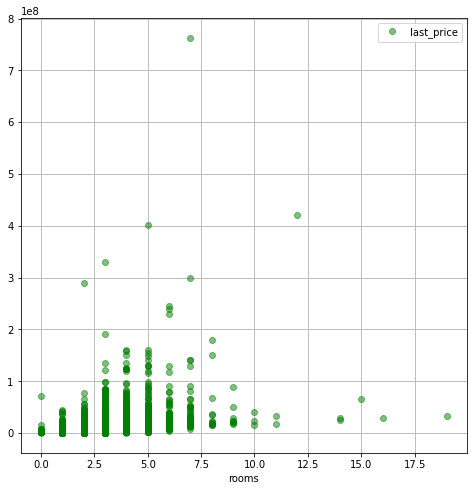

Зависимость цены квартиры от количество комнат:


0.36342062218770704

In [74]:
#найдем зависимость цены квартиры от количество комнат
df.plot(x='rooms', y='last_price', color='g', figsize=(8, 8), grid=True, style='o', alpha=0.5) 
plt.show()
print('Зависимость цены квартиры от количество комнат:')
df['rooms'].corr(df['last_price'])

Коэффициент корреляции составляет 0,36 - это умеренная положительная связь. Зависимость цены квартиры от количество комнат ниже, чем зависимость от общей площади квартиры. Т.е. количество комнат влияет на общую стоимость меньше, чем общая площадь квартиры.

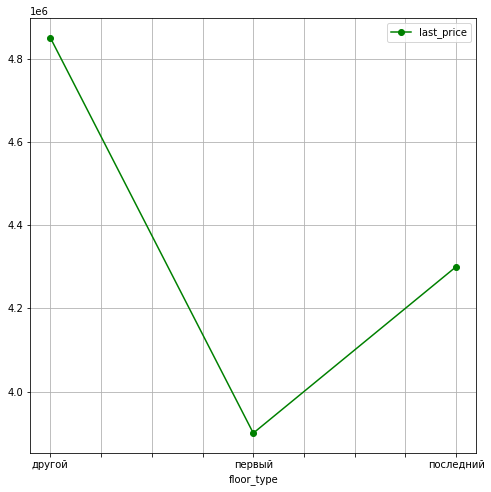

In [75]:
#найдем зависимость цены квартиры от типa этажа, на котором расположена квартира (первый, последний, другой)
(                                                    
    df.pivot_table(index='floor_type', values='last_price', aggfunc = 'median')
    .plot(color='g', figsize=(8, 8), grid=True, style='o-')
)
plt.show()

Наиболее низкие по стоимости квартиры находятся на первом этаже. Далее идут квартиры на последних этажах. Самые дорогие квартиры на промежуточных этажах.

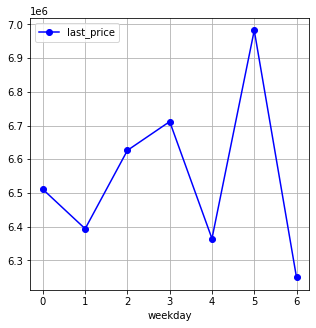

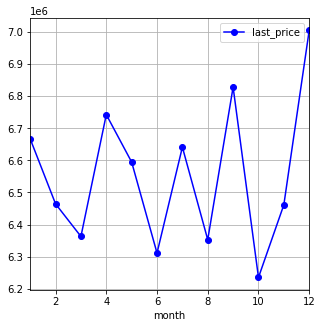

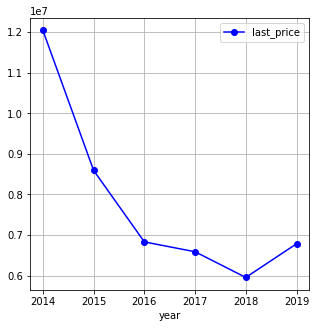

In [76]:
(                                                    #найдем зависимость цены квартиры от дня недели
    df.pivot_table(index='weekday', values='last_price')
    .plot(color='b', figsize=(5, 5), grid=True, style='o-')
)
plt.show()


(                                                    #найдем зависимость цены квартиры от месяца
    df.pivot_table(index='month', values='last_price')
    .plot(color='b', figsize=(5, 5), grid=True, style='o-', xlim=(1,12))
)
plt.show()


(                                                    #найдем зависимость цены квартиры от года
    df.pivot_table(index='year', values='last_price')
    .plot(color='b', figsize=(5, 5), grid=True, style='o-')
)
plt.show()

День недели:  В пятницу квартиры имеют самую высокую стоимость, в субботу -  самую низкую.  
Месяц:  В декабре квартиры имеют самую высокую стоимость, в октябре -  самую низкую.  
Год:  С 2014 по 2018гг. наблюдается понижение стоимости квартир. Наименьшая стоимость зафиксирована в 2018году. С 2018 года происходит повышение стоимости.

Получим следующие выводы:  
     1. Коэффициент корреляции составляет 0,65 - это умеренная положительная связь. Чем больше площадь квартиры, тем выше общая стоимость.  
     2. Коэффициент корреляции составляет 0,59 - это умеренная положительная связь. Чем больше жилая площадь квартиры, тем выше общая стоимость. Зависимость цены квартиры от жилой площади немного ниже, чем зависимость цены квартиры от общей площади квартиры.  
     3. Коэффициент корреляции составляет 0,52 - это умеренная положительная связь. Чем больше площадь кухни, тем выше общая стоимость. Зависимость цены квартиры от площади кухни ниже, чем зависимость от жилой площади и общей площади квартиры.   
     4. Коэффициент корреляции составляет 0,36 - это умеренная положительная связь. Зависимость цены квартиры от количество комнат ниже, чем зависимость от общей площади квартиры. Т.е. количество комнат влияет на общую стоимость меньше, чем общая площадь квартиры.  
     5. Самые низкие по стоимости квартиры находятся на первом этаже. Далее идут квартиры на последних этажах. Самые дорогие квартиры на промежуточных этажах.  
     6. В пятницу квартиры имеют самую высокую стоимость, в субботу - самую низкую.  
     7. В декабре квартиры имеют самую высокую стоимость, в октябре - самую низкую.   
     8. С 2014 по 2018гг. наблюдается понижение стоимости квартир. Наименьшая стоимость зафиксирована в 2018году. С 2018 года происходит повышение стоимости.  
     Сильнее всего на стоимость влияет общая площадь квартиры, затем площадь жилой зоны и площадь кухни. Количество комнат влияет на общую стоимость меньше. 

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:  
    - выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [77]:
top = df['locality_name'].value_counts().head(10)
top_price = df.query('locality_name in (@top.index)').pivot_table(values='square_meter_price', index='locality_name')
top_price.sort_values('square_meter_price', ascending=False)

,square_meter_price
locality_name,
Санкт-Петербург,114848.565231
Пушкин,103125.373984
деревня Кудрово,92473.086957
поселок Парголово,90175.489297
поселок Мурино,85681.305755
поселок Шушары,78676.904545
Колпино,75424.150888
Гатчина,68745.693811
Всеволожск,68654.007538


В городах миллионниках стоимость недвижимости за квадратный метр выше, чем в других городах. Как и предполагалась, самая высокая стоимость за квадратный метр в Санкт-Петербурге, затем в парковом городе Пушкине. В деревнях и поселках цена недвижимости за квадратный метр ниже, чем в городах. 

Выбрав населенные пункты с наибольшим числом объявлений и рассчитав стоимость квадратного метра в каждом из этих населенных пунктов, получим следующее распределение: Санкт-Петербург, Пушкин, деревня Кудрово, поселок Парголово, поселок Мурино,
поселок Шушары, Колпино, Гатчина, Всеволожск, Выборг. 

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим их среднюю стоимость на разном удалении от центра:  
    -  учтём каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;  
    -  опишем, как стоимость объекта зависит от расстояния до центра города;  
    -  построем график изменения средней цены для каждого километра от центра Петербурга.

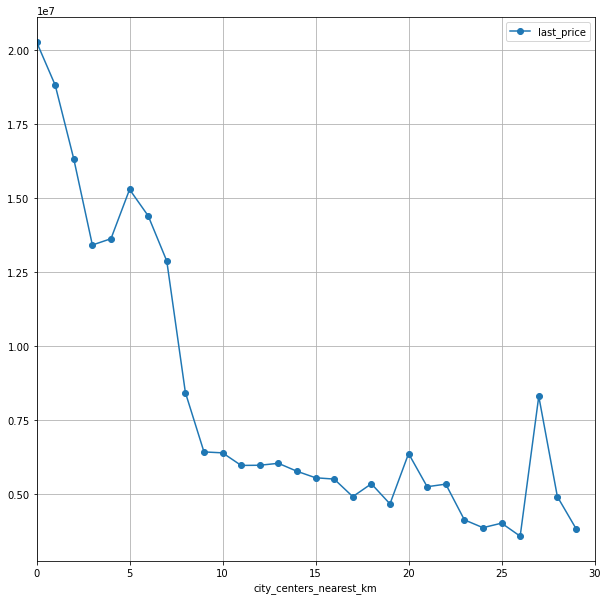

In [78]:
df['city_centers_nearest_km'] = df['city_centers_nearest']/1000  
df['city_centers_nearest_km'] = df['city_centers_nearest_km'].fillna(value=0).astype(int)
pivot_table_km = df.query('locality_name == "Санкт-Петербург" and city_centers_nearest !=999999').pivot_table(index = 'city_centers_nearest_km', values = 'last_price', aggfunc = 'mean')
pivot_table_km.plot(grid=True, style='o-', xlim=(0,30), figsize=(10, 10))
plt.show()

На основании графика изменения средней цены для каждого километра от центра Петербурга можно сделать следующие выводы:  
1. Самая высокая стоимость недвижимости в самом центре города (в радиусе 2,5 км).  
2. В пределах центра на расстоянии от 2,5 до 5 км неравномерное уменьшение стоимости недвижимости.   
3. С каждым километром удаления от центра города происходит равномерное уменьшение стоимости недвижимости (от 5 до 17 км).  
4. Расстояние от центра города, превывающее 17 км является загородным. По графику мы видим, что стоимость загородной недвижимости имеет максимальное значение на расстоянии около 27 км. от центра Санкт-Петербурга и второй максимум на расстоянии 20 км. 

### Напишите общий вывод

В данном проекте была проделана следующая работа: 
    -получена общая информация о данных в таблице  
    -название столбцов приведено к правильному синтаксису  
    -проведен подсчет пропусков, выявлено большое количество пропусков  
1. В столбцах balcony, parks_around_3000, ponds_around_3000, days_exposition заменены пропущенные значения на '0'.  
2. В столбце floors_total удалены пропущенные значения.  
3. В столбце ceiling_height пропуски заполнены с помощью создания функции, определяющей расположение объекта недвижимости относительно центра.  
4. Пропущенные значения заменены на медиальные в каждой категории category_city_centers_nearest.  
5. В столбцах living_area, kitchen_area пропуски заполнены средними значениями.  
    -проведен подсчет явных дубликатов. Явных дубликатов не обнаружено.  
    -проведен подсчет неявных дубликатов.  
6. В столбце locality_name просмотрены уникальные отсортированные названия населённых пунктов. Сделана замену однотипных названий населенных пуктов.  
    -проверены столбцы на аномалии или нестандартные значения.  
    -в каждом столбце установим корректный тип данных.  

Добавлены новые параметры в таблицу:  
        – цена одного квадратного метра;  
        – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);  
        – месяц публикации объявления;  
        – год публикации объявления;  
        – тип этажа квартиры (значения — «первый», «последний», «другой»);  
        – расстояние до центра города в километрах.  

Рассмотрена основная информация об объектах недвижимости.   
Постороем гистограммы, которые покажут нам графики по следующим параметрам квартир:
        -общая площадь;
        -жилая площадь;
        -площадь кухни;
        -цена объекта;
        -количество комнат;
        -высота потолков;
        -тип этажа квартиры («первый», «последний», «другой»);
        -общее количество этажей в доме;
        -расстояние до центра города в метрах;
        -расстояние до ближайшего парка.
Получим следующие выводы:  
1. Большинство квартир от 40 до 70 квадратных метров общей площадью. Меньше 25 кв.м. и больше 150 кв.м. встречаются кврайне редко. Также встречаются квартиры сомнительных площадей (минимум и максимум): 12 кв.м. и 900 кв.м.  
2. На данном графике есть несколько максимумов. Первый максимум это жилая площадь однокомнатных квартир или студий. Их площадь составляет 15-20 кв.м. Второй максимум это жилая площадь двухкомнатных квартир. Мх площадь составляет 25-30 кв.м. Третий максимум это жилая площадь трехкомнатных квартир. Их площадь составляет 40-50 кв.м.  
3. Большинство квартир имеют кухни площадью от 5 до 15 кв.м. Больше 30 кв.м. кухни встречаются крайне редко.  
4. Большинство квартир стоят от 2,5 до 7,5 млн.руб. Средняя цена составляет 5 млн.руб.  
5. В основном квартиры состоят из 1, 2 и 3 комнат. Больше 6 комнат практически не встречаются.  
6. В основном квартиры имеют высоту потолка от 2,5 до 3 метров. Есть аномальные значения более 27 м.  
7. Самыми распространенными являются квартиры, находящиеся от 2 до предпоследнего этажа.   
8. Самые полулярными являются дома от 5 до 16 этажей.  
9. В основном квартиры находятся на расстоянии 5000 - 15000 м до центра города.  
10. Чаще всего квартиры находятся на расстоянии 250 - 750 м до ближайшего парка.  

Далее изучено, как быстро продавались квартиры (столбец days_exposition): 
      - построена гистограмма; 
      - рассчитаны среднее и медиана; 
Получим следующие выводы:     
1. Квартиры продаются лучше всего в первые дни публикации объявления. В первые 100 дней продано больше всего квартир.  
2. Среднее время продажи 180 дней.  
3. Медианное время продажи 95 дней.   
4. Быстрой продажей можно считать период менее 45 дней.   
5. Долгой продажей период более 230 дней.  

Затем определены факторы, которые больше всего влияют на общую (полную) стоимость объекта. 
Построены графики, которые показывают зависимость цены от параметров: 
      - общая площадь;  
      - жилая площадь;  
      - площадь кухни;  
      - количество комнат;  
      - тип этажа, на котором расположена квартира (первый, последний, другой);  
      - дата размещения (день недели, месяц, год).
Получим следующие выводы:  
1. Коэффициент корреляции составляет 0,65 - это умеренная положительная связь. Чем больше площадь квартиры, тем выше общая стоимость.  
2. Коэффициент корреляции составляет 0,59 - это умеренная положительная связь. Чем больше жилая площадь квартиры, тем выше общая стоимость. Зависимость цены квартиры от жилой площади немного ниже, чем зависимость цены квартиры от общей площади квартиры.  
3. Коэффициент корреляции составляет 0,52 - это умеренная положительная связь. Чем больше площадь кухни, тем выше общая стоимость. Зависимость цены квартиры от площади кухни ниже, чем зависимость от жилой площади и общей площади квартиры.   
4. Коэффициент корреляции составляет 0,36 - это умеренная положительная связь. Зависимость цены квартиры от количество комнат ниже, чем зависимость от общей площади квартиры. Т.е. количество комнат влияет на общую стоимость меньше, чем общая площадь квартиры.  
5. Самые низкие по стоимости квартиры находятся на первом этаже. Далее идут квартиры на последних этажах. Самые дорогие квартиры на промежуточных этажах.  
6. В пятницу квартиры имеют самую высокую стоимость, в субботу - самую низкую.  
7. В декабре квартиры имеют самую высокую стоимость, в октябре - самую низкую.   
8. С 2014 по 2018гг. наблюдается понижение стоимости квартир. Наименьшая стоимость зафиксирована в 2018году. С 2018 года происходит повышение стоимости.  
     Сильнее всего на стоимость влияет общая площадь квартиры, затем площадь жилой зоны и площадь кухни. Количество комнат влияет на общую стоимость меньше. 

На следующем этапе посчитана средняя ценя одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
Получим следующие выводы:  
    Выбрав населенные пункты с наибольшим числом объявлений и рассчитав стоимость квадратного метра в каждом из этих населенных пунктов, получим следующее распределение: Санкт-Петербург, Пушкин, деревня Кудрово, поселок Парголово, поселок Мурино, поселок Шушары, Колпино, Гатчина, Всеволожск, Выборг.

В результате выделены квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислены их средняя стоимость на разном удалении от центра:  
    - учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;   
    - построен график изменения средней цены для каждого километра от центра Петербурга.  
 
На основании графика изменения средней цены для каждого километра от центра Петербурга можно сделать следующие выводы:  
1. Самая высокая стоимость недвижимости в самом центре города (в радиусе 2,5 км).  
2. В пределах центра на расстоянии от 2,5 до 5 км неравномерное уменьшение стоимости недвижимости.   
3. С каждым километром удаления от центра города происходит равномерное уменьшение стоимости недвижимости (от 5 до 17 км).  
4. Расстояние от центра города, превывающее 17 км является загородным. По графику мы видим, что стоимость загородной недвижимости имеет максимальное значение на расстоянии около 27 км. от центра Санкт-Петербурга и второй максимум на расстоянии 20 км. 
